### Analysing Merck FEP+ results

In [99]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import kendalltau


In [7]:
path = "/Users/matt/Git/fep-merck/data"
systems = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [115]:
filename = "results_edges_5ns.csv"
skip = ["eg5_alternativeloop"]
exp_col = "Exp."
comp_col = "FEP"
rmse = {}

for system in systems:
    
    if system in skip:
        continue

    edge_data = pd.read_csv(os.path.join(path, system, filename))
    edge_data.dropna(subset=[exp_col, comp_col], inplace=True)

    for col in ['Ligand1', 'Ligand2']:
        edge_data[col] = [str(lig_id).rstrip('.0') for lig_id in edge_data[col]]

    mse_pw = np.square(np.subtract(edge_data[exp_col], edge_data[comp_col])).mean()
    rmse_pw = np.sqrt(mse_pw)
    rmse[system] = rmse_pw
    print(f"{system}: {rmse_pw:.2f}")
    

shp2: 1.36
syk: 1.27
eg5: 1.35
cmet: 1.38
cdk8: 1.55
hif2a: 1.52
tnks2: 1.21
pfkfb3: 1.37


In [116]:
filename = "results_5ns.csv"
skip = ["eg5_alternativeloop"]
exp_col = "exp_dG"
comp_col = "pred_dG"
sys_data = {}
kts = {}

for system in systems:
    
    if system in skip:
        continue

    data = pd.read_csv(os.path.join(path, system, filename))
    data.columns = ['units','no','ligand','quality','pred_dG','pred_err','exp_dG','structure']
    data.dropna(subset=[exp_col, comp_col], inplace=True)

    kt = kendalltau(data[exp_col], data[comp_col])
    kts[system] = kt
    sys_data[system] = data
    

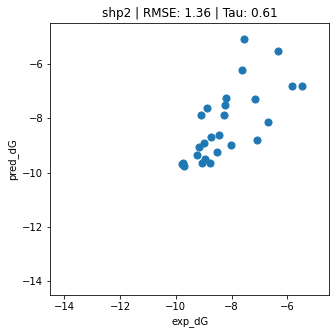

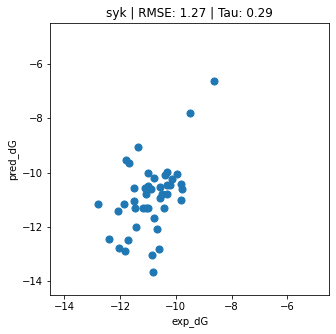

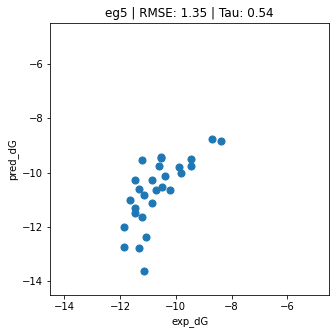

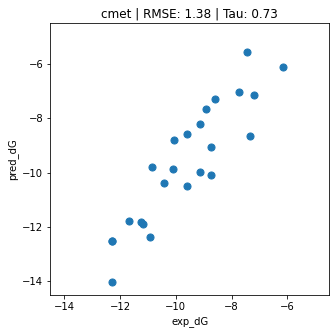

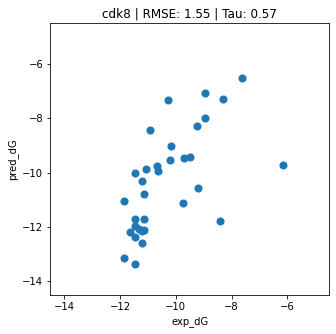

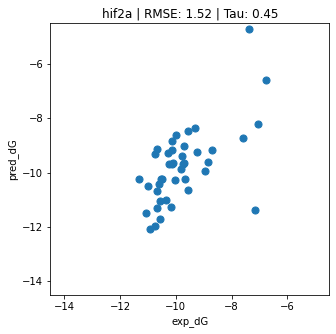

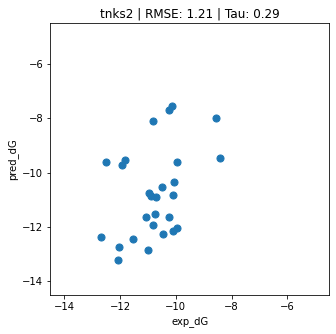

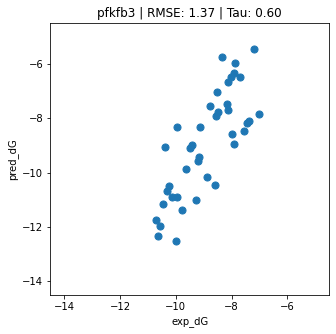

In [118]:
for system in systems:
    if system in skip:
        continue
    sys_data[system].plot.scatter(x='exp_dG', y='pred_dG', figsize=(5,5), s=50, xlim=(-14.5,-4.5), ylim=(-14.5,-4.5), title=f'{system} | RMSE: {rmse[system]:.2f} | Tau: {kts[system][0]:.2f}')